# Curso de Big Data

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el código sea fácil de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Miércoles 4 de octubre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 1 deben estar dentro de esa carpeta.
- También deben completar el link de su repositorio -para que pueda ser clonado y corregido- en la siguiente google sheet: https://docs.google.com/spreadsheets/d/11nJY1Frgla45sTgsPiSeOZM9iBM-XRWh/edit?usp=sharing&ouid=105815768529474116534&rtpof=true&sd=true
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No completen la google sheet hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se  corregirán sus tareas hasta no ver el link en la google sheet.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [41]:
# Asegurarse que tienes instalado las siguientes librerías
#!pip install requests 
#!pip install beautifulsoup4
#!pip install pandas

In [1]:
# Importamos las librerías necesarias
import requests
import pandas as pd

#### Consulta de búsqueda
Ahora vamos a obtener los ítems de consulta de búsqueda usando la API de Mercado Libre. Buscaremos **auriculares inalámbricos**. Como estamos interesados en obtener resultados para Argentina, usaremos el código MLA para _site_.

In [2]:
busqueda = "auriculares inalambricos"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", busqueda.replace(" ", "%20"))

# Hacemos el pedido o request y obtenemos la response
response = requests.request("GET", url)

In [44]:
#Guardamos el resultado (response) en un diccionario (.json)
data = response.json()

In [45]:
# Con las key de este diccionario podemos crear la base de datos.

# Veamos cuantos resultados tenemos:
print('Obs:', len(data.get('results', [])))

Obs: 50


### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

#### Creación de dataframe y exportar a csv file

In [46]:
# Creamos objectos vacíos que llenaremos con toda la información relevante
product_ids = []
product_names = []
product_prices = []
product_links = []

In [47]:
# Iteramos y obtenemos la información
for result in data.get('results', []):
    product_id = result.get('id')
    product_name = result.get('title')
    product_price = result.get('price')
    product_link = result.get('permalink')
    
    # Append
    product_ids.append(product_id)
    product_names.append(product_name)
    product_prices.append(product_price)
    product_links.append(product_link)

In [48]:
# Creamos la dataframe
cleandata =   pd.DataFrame({
            'id': product_ids,
            'product': product_names,
            'price': product_prices,
            'link': product_links
            })

In [49]:
# Previsualizamos
cleandata.to_csv('clean_product_data.csv', index=False) #Exportamos a CSV
cleandata

,id,product,price,link
0,MLA1251731657,Auriculares F95 In-ear Inalámbricos Alpina Po...,3900.00,https://www.mercadolibre.com.ar/auriculares-f9...
1,MLA1237194862,Auriculares Bluetooth In-ear Gamer F9-5 Negro ...,3015.00,https://www.mercadolibre.com.ar/auriculares-bl...
2,MLA1412826144,Auriculares Inalámbricos Xiaomi Redmi Buds Ess...,12495.29,https://www.mercadolibre.com.ar/auriculares-in...
3,MLA1479772226,Auriculares In-ear Gamer Inalámbricos Fan Pro ...,3611.16,https://www.mercadolibre.com.ar/auriculares-in...
4,MLA1385805051,Auriculares Bluetooth Inalámbricos Huellitas G...,6999.00,https://www.mercadolibre.com.ar/auriculares-bl...
5,MLA1449085246,Auriculares In-ear Inalámbricos A6s Negro,2955.00,https://www.mercadolibre.com.ar/auriculares-in...
6,MLA1391039563,Auriculares In-ear Inalámbricos Xiaomi Redmi A...,13699.00,https://www.mercadolibre.com.ar/auriculares-in...
7,MLA1411030020,Auriculares In-ear Gamer Inalámbricos Tws F9-5...,3023.00,https://www.mercadolibre.com.ar/auriculares-in...
8,MLA1443556872,Auriculares In-ear Inalámbricos Bluetooth F9-5...,3055.00,https://www.mercadolibre.com.ar/auriculares-in...
9,MLA1439029838,Auriculares Inalambricos A8s Alpina Touch 25 H...,4160.00,https://www.mercadolibre.com.ar/auriculares-in...


#### Algunos descriptivos sobre el precio

In [50]:
print("Precio mínimo:", cleandata['price'].min(), "ARS")
print("Precio mediano:", cleandata['price'].median(), "ARS")
print("Precio promedio:", cleandata['price'].mean(), "ARS")
print("Precio máximo:", cleandata['price'].max(), "ARS")

Precio mínimo: 2899.0 ARS
Precio mediano: 13631.0 ARS
Precio promedio: 20655.422800000004 ARS
Precio máximo: 185997.0 ARS


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

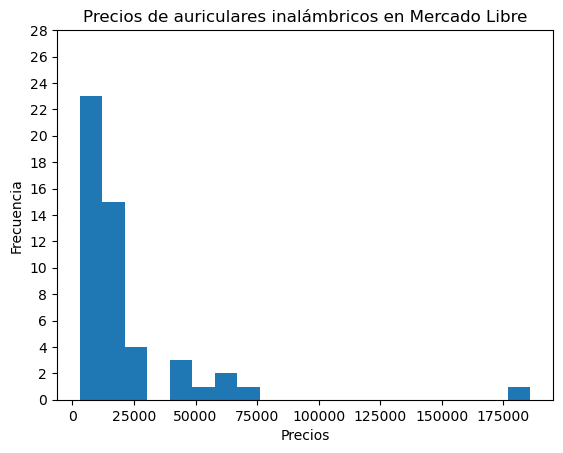

In [26]:
# Creamos el gráfico con el estilo orientado a objetos.
#Primero, importamos la librería:

import matplotlib.pyplot as plt

# Creamos la figura y los ejes
fig, ax = plt.subplots() 

#Definimos la variable sobre la que haremos el histograma y la cantidad de barras que tendrá

ax.hist(cleandata["price"], bins=20)

# Modificamos labels y título
ax.set_xlabel("Precios")
ax.set_ylabel("Frecuencia")
ax.set_title("Precios de auriculares inalámbricos en Mercado Libre")

#Agregamos más etiquetas al eje Y para visualizar mejor las frecuencias

import numpy as np

ax.set_yticks(np.arange(0, 30, step=2))





In [52]:
#Al observar el histograma, podemos ver que hay un outlier para el que el precio toma un valor mayor a 175.000. 
#Podemos seleccionar ese outlier de la siguiente manera:

outliers= cleandata[cleandata["price"]>175000]
outliers

,id,product,price,link
47,MLA1387434654,Apple AirPods Pro (2ª Generación),185997.0,https://www.mercadolibre.com.ar/apple-airpods-...
